In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Convex vs. non-convex functions

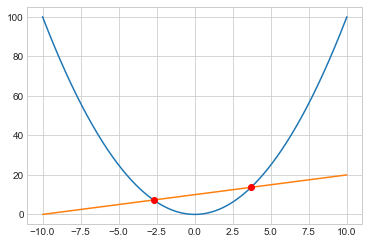

In [6]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(-10, 10, 1000)

f = lambda x : x**2
g = lambda x : x+10

plt.plot(x, f(x));
plt.plot(x, g(x), linestyle='solid')

def findIntersection(fun1, fun2, x0):
    # Find a point of intersection between fun1 and fun2 near x0
    return fsolve(lambda x: fun1(x) - fun2(x), x0)

intersection1 = findIntersection(f,g,10.0)  
intersection2 = findIntersection(f,g,-10.0)

plt.plot(intersection1,f(intersection1),'ro')
plt.plot(intersection2,f(intersection2),'ro')
plt.show()

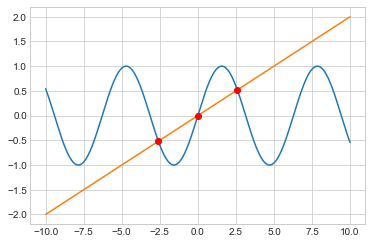

In [8]:
f = lambda x : np.sin(x)
g = lambda x : 0.2*x

plt.plot(x, f(x))
plt.plot(x, g(x), linestyle='solid')

intersection1 = findIntersection(f,g,2.0)  
intersection2 = findIntersection(f,g,0)
intersection3 = findIntersection(f,g,-2.0)

plt.plot(intersection1,f(intersection1),'ro')
plt.plot(intersection2,f(intersection2),'ro')
plt.plot(intersection3,f(intersection3),'ro')
plt.show()

In [14]:
import cvxpy 
from cvxpy import log

# A scalar variable.
a = cvxpy.Variable()

# Vector variable with shape (5,).
x = cvxpy.Variable(5)

# Matrix variable with shape (5, 1).
x = cvxpy.Variable((5, 1))

# Matrix variable with shape (4, 7).
A = cvxpy.Variable((4, 7))

In [15]:
# Create two scalar optimization variables.
x = cvxpy.Variable()
y = cvxpy.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1] 
# Note: constraints can only use ==, >=, <=.  The other operators are not allowed.

# Form objective.
obj = cvxpy.Minimize((x - y)**2)

# Form and solve problem.
prob = cvxpy.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print(f"optimal var precise : x = {x.value} , y = {y.value} ")
optimal_x = round(float(x.value),5)
optimal_y = round(float(y.value),5)
print(f"optimal var: x = {optimal_x} , y = {optimal_y} ")

status: optimal
optimal value 1.00000063426662
optimal var precise : x = 1.0000001585666298 , y = -1.5856662981725727e-07 
optimal var: x = 1.0 , y = -0.0 


In [16]:
import math 

print("\nPROBLEM: ")
print("Three cakes have to be divided among 2 people with values:")
print("2 3 4")
print("8 7 6")

# Define x,y,z = the fraction of each region given to player 1.
x = cvxpy.Variable()
y = cvxpy.Variable()
z = cvxpy.Variable()

print("\nMaximize the sum of logs:")
prob = cvxpy.Problem(
    objective   =  cvxpy.Maximize(log(2*x + 3*y + 4*z) + log(8*(1-x)+7*(1-y)+6*(1-z))),
    constraints = [0 <= x, x <= 1, 0<= y , y <= 1, 0 <= z, z <= 1])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal product", math.exp(prob.value))
print("optimal x", round(float(x.value),5))
print("optimal y", round(float(y.value),5))
print("optimal z", round(float(z.value),5))


PROBLEM: 
Three cakes have to be divided among 2 people with values:
2 3 4
8 7 6

Maximize the sum of logs:
status: optimal
optimal value 4.150102496256571
optimal product 63.440502378907006
optimal x 0.0
optimal y 0.40468
optimal z 1.0


In [24]:
x = cvxpy.Variable()

# An infeasible problem.
prob = cvxpy.Problem(cvxpy.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

# An unbounded problem.
prob = cvxpy.Problem(cvxpy.Minimize(x), [x <= 1])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf
